In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [ ]:
# Confirmed cases and Death rates
Original_Confirmed = pd.read_csv("/content/gdrive/MyDrive/College/CS/CS 506 Final Project/Data/time_series_covid19_confirmed_US.csv")
# (3340, 435)
Original_Deaths = pd.read_csv("/content/gdrive/MyDrive/College/CS/CS 506 Final Project/Data/time_series_covid19_deaths_US.csv")
# (3340, 436)
 
US_Confirmed = Original_Confirmed.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
US_Deaths = Original_Deaths.drop(columns=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', ]) 

In [18]:
# fill NaN with median values
US_Confirmed = US_Confirmed.fillna(US_Confirmed.median())
US_Deaths = US_Deaths.fillna(US_Deaths.median())


stateNames = ["Alabama", "Alaska", 
              "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", 
              "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", 
              "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", 
              "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", 
              "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
              "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"] # !! remove "American Samoa", "Guam", "Northern Mariana Islands", "Puerto Rico", "Virgin Islands" from this dataset!!!

# removing unassigned data
drop_data = ["Unassigned"] # drop unassgined data
_ = []
for i, row in US_Confirmed.iterrows():
  if row['Admin2'] in drop_data:
    _.append(i)
# drop these row indexes from dataFrame 
US_Confirmed.drop(_, inplace = True)


State_Confirmed = []
State_Death = []
for i in stateNames:
  State_Confirmed.append(US_Confirmed.loc[US_Confirmed['Province_State'] == i, '3/20/21'].sum())

for i in stateNames:
  State_Death.append(US_Deaths.loc[US_Deaths['Province_State'] == i, '3/20/21'].sum())

50
50


In [ ]:
# Loading insurance info into DataFrames
US_Insurance = pd.read_csv("/content/gdrive/MyDrive/College/CS/CS 506 Final Project/Data/SAHIE_21MAR21_16_03_44_68.csv")
 
# Feature extraction
US_Insurance = US_Insurance.drop(columns=['Age Category', 'Income Category', 'Race Category', 'Sex Category', 'Year', 'ID', 'Demographic Group: MOE', 'Uninsured: %', 'Uninsured: %MOE', 'Insured: %MOE'])

# fill NaN with median values
US_Insurance['Insured: Number'] = US_Insurance['Insured: Number'].fillna(US_Insurance.median())


# removing state data from dataset
states_i = []
for i, row in US_Insurance.iterrows():
  if row['Name'] in stateNames:
    states_i.append(i)


# save states data
State_Insurance = US_Insurance.iloc[states_i]


# drop these row indexes from dataFrame 
US_Insurance.drop(states_i, inplace = True) 
 


max 930,499
min 1,002,810


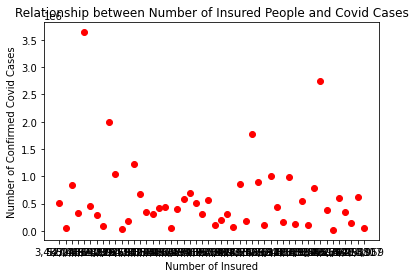

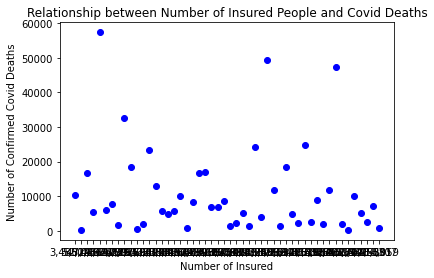

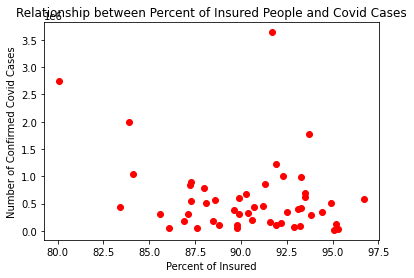

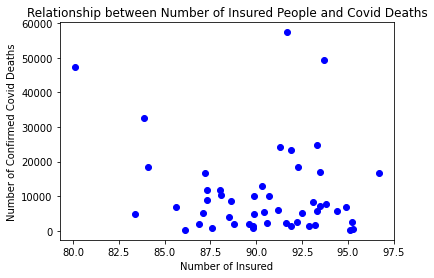

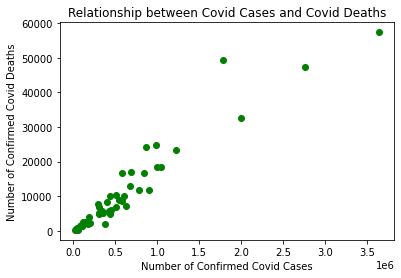

In [47]:
#print(US_Insurance)
#print(US_Confirmed)
print("max", State_Insurance['Insured: Number'].max())
print("min", State_Insurance['Insured: Number'].min())

# scatter plots

# x-axis: # insured, y-axis: confirmed cases
plt.scatter(State_Insurance['Insured: Number'], State_Confirmed, c='r')
plt.xlabel('Number of Insured')
#plt.xticks(np.arange(State_Insurance['Insured: Number'].min(), State_Insurance['Insured: Number'].max(), 100000))
plt.ylabel('Number of Confirmed Covid Cases')
plt.title("Relationship between Number of Insured People and Covid Cases")
plt.show()

# x-axis: # insured, y-axis: deaths
plt.scatter(State_Insurance['Insured: Number'], State_Death, c='b')
plt.xlabel('Number of Insured')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Number of Insured People and Covid Deaths")
plt.show()

# x-axis: % insured, y-axis: confirmed cases
plt.scatter(State_Insurance['Insured: %'], State_Confirmed, c='r')
plt.xlabel('Percent of Insured')
plt.ylabel('Number of Confirmed Covid Cases')
plt.title("Relationship between Percent of Insured People and Covid Cases")
plt.show()

# x-axis: % insured, y-axis: deaths
plt.scatter(State_Insurance['Insured: %'], State_Death, c='b')
plt.xlabel('Number of Insured')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Number of Insured People and Covid Deaths")
plt.show()

# x-axis: confirmed cases, y-axis: deaths
plt.scatter(State_Confirmed, State_Death, c='g')
plt.xlabel('Number of Confirmed Covid Cases')
plt.ylabel('Number of Confirmed Covid Deaths')
plt.title("Relationship between Covid Cases and Covid Deaths")
plt.show()
 
# bar graph: state and confirmed cases / death rates